### propagacion de la afinidad


In [2]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

In [3]:
centers = [[1,1], [-1,-1], [1,-1]]
X, labels = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=None)

In [4]:
import matplotlib.pyplot as plt
from itertools import cycle

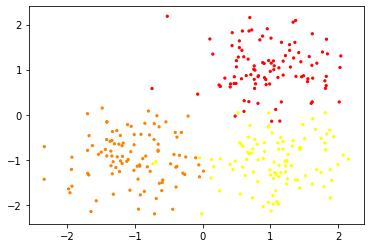

In [5]:
plt.scatter(X[:,0], X[:,1], c=labels, s = 5, cmap = "autumn")

In [6]:

af = AffinityPropagation(random_state=0).fit(X)


In [7]:
labels = af.labels_

In [8]:
cluster_center_ids = af.cluster_centers_indices_

In [9]:
n_clust = len(cluster_center_ids)
n_clust

14

In [13]:
def report_affinity_propagation(X):
    af = AffinityPropagation(preference= -20, random_state=0).fit(X)
    cluster_center_ids = af.cluster_centers_indices_
    n_clust = len(cluster_center_ids)
    clust_labels = af.labels_
    
    print("Número estimado de clusters: %d"%n_clust)
    print("Homogeneidad: %0.3f"%metrics.homogeneity_score(labels, clust_labels))
    print("Completitud: %0.3f"%metrics.completeness_score(labels, clust_labels))
    print("V-measure: %0.3f"%metrics.v_measure_score(labels, clust_labels))
    print("R2 ajustado: %0.3f"%metrics.adjusted_rand_score(labels, clust_labels))
    print("Información mútua ajustada: %0.3f"%metrics.adjusted_mutual_info_score(labels, clust_labels))
    print("Coeficiente de la silueta: %0.3f"%metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    
    plt.figure(figsize=(16,9))
    plt.clf()
    
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clust), colors):
        class_members = (clust_labels==k)
        clust_center = X[cluster_center_ids[k]]
        plt.plot(X[class_members,0], X[class_members, 1], col +'.')
        plt.plot(clust_center[0], clust_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
        for x in X[class_members]:
            plt.plot([clust_center[0],x[0]], [clust_center[1], x[1]], col)
            
    plt.title("Número estimado de clusters %d"%n_clust)
    plt.show()

Número estimado de clusters: 5
Homogeneidad: 0.473
Completitud: 0.787
V-measure: 0.591
R2 ajustado: 0.307
Información mútua ajustada: 0.571
Coeficiente de la silueta: 0.491


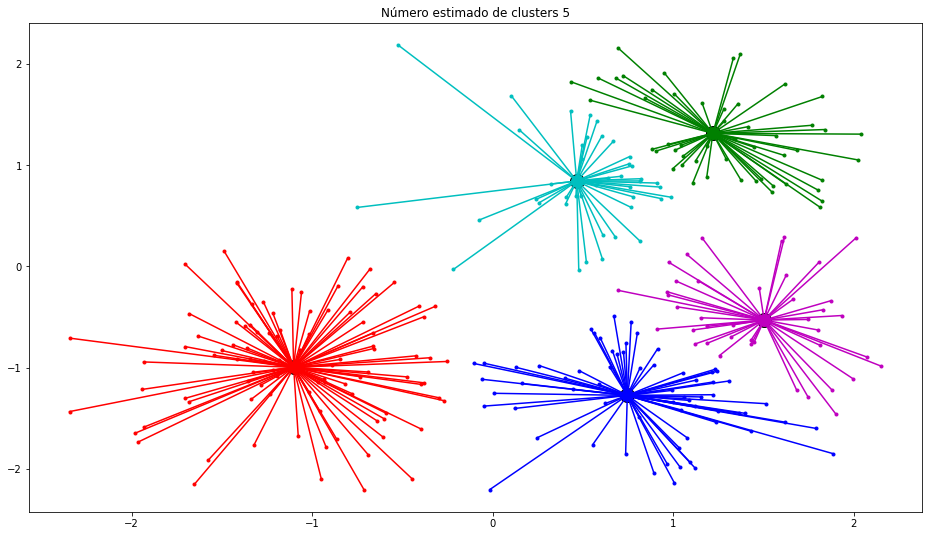

In [14]:

report_affinity_propagation(X)

* vemos en los resultados, la homogeneidad de los cluster, la completidud , el r2 , y coeficiente de la siluetaa; todos estos datos deben estar cerca de 1, lo que nos indicaria la homogeneidad de los grupos(cluster)
* ojo en esta grafica vemos bien los cluster , pero debido al cambio en sklearn affinity preference (cuando mas bajo sea menos cluster vemos) vemos ahora 5 cuando podrian ser 6

In [12]:
from sklearn_extra.cluster import KMedoids

* Distribucinoes de anillo

* muchas veces vemos los grupos agrupados en circulos facil de ver, pero a veces hay representaciones no tan sencillas, ejemplo un anillo , y para eso usamos 
    otros metodos. 
* KImedois lo que hace que establece los centros en medio (toma las medias de la distancia) a diferencia de kmeans que los escoge de forma
    aleatoria; por eso este ultimo es mas sensible a outliers al contrario que Kmedoids (ver manhattan tambien para outlieres)

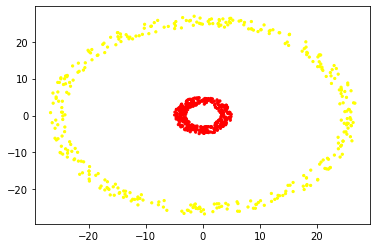

In [23]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import pandas as pd

def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

data1 = ring(3, 5)
data2 = ring(24, 27)

data = np.concatenate([data1, data2], axis = 0)
labels = np.concatenate([[0 for i in range(0,len(data1))], [1 for i in range(0,len(data2))]])
plt.scatter(data[:,0], data[:,1], c = labels, s = 5, cmap = "autumn")

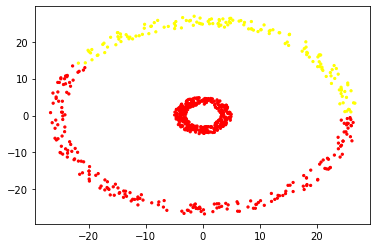

In [24]:
# ahora vemos las diferencias con kmeans y kmoide
from sklearn.cluster import KMeans

km = KMeans(2).fit(data)
clust = km.predict(data)
plt.scatter(data[:,0], data[:, 1], c = clust, s = 5, cmap="autumn")

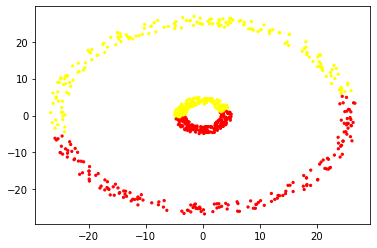

In [25]:
kmed = KMedoids(2).fit_predict(data)
plt.scatter(data[:,0], data[:,1], c=kmed, s=5, cmap="autumn")

* en este vemos que hay diferencias, debido a la eleccion de los centroides al principio. deberia
* se puede hacer tambien transformaciones lineales, cuando no sean claros los graficos. por ejemplo a veces con imagenes
  es bueno buscar los "vecinos"; esto lo hace por ejemplo el clustering espectral (transforma los datos)
    

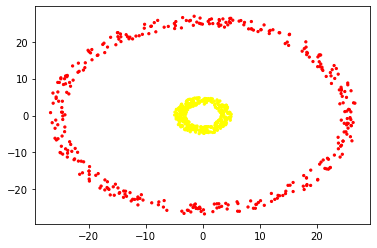

In [29]:
from sklearn.cluster import SpectralClustering
clust = SpectralClustering(2).fit_predict(data)
plt.scatter(data[:,0], data[:,1], c=clust, s=5, cmap="autumn")

In [ ]:
# vemos bien claro los grupos, aunque tarda mas computacionalmente. podemos usar este modelo cuando todo falle.

### Resumen
* Podemos estimar la k:
    No: Propagación de la afinidad
    Si: Podemos usar la distancia Euclídea:
        Si: K-Means
        No: Buscar valores centrales:
            Si: K-Medoides
            No: Los datos son linealmente separables:
                Si: Clustering aglomerativo
                No: Clustering Espectral